In [27]:
import csv
import os
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from openai import OpenAI
import itertools
from tqdm import tqdm
import json
import numpy as np
import matplotlib.dates as mdates



In [31]:
power_data = pd.read_csv("PwrData_2023_11_30_at_11_12_27.csv")
execution_times = pd.read_csv("execution_times.csv")

In [32]:
power_data.columns

Index(['System Time', ' Elapsed Time (sec)', ' Package Power (Watt)',
       ' CPU Power (Watt)', ' DRAM Power (Watt)', ' GPU Power (Watt)',
       ' E-Core Frequency (Mhz)', ' P-Core Frequency (Mhz)',
       ' GPU Frequency (Mhz)', ' CPU MIN Temperature (C)',
       ' CPU AVG Temperature (C)', ' CPU MAX Temperature (C)',
       ' GPU AVG Temperature (C)', ' CPU Utilization (%)',
       ' E-Core Utilization (%)', ' P-Core Utilization (%)',
       ' GPU Utilization (%)'],
      dtype='object')

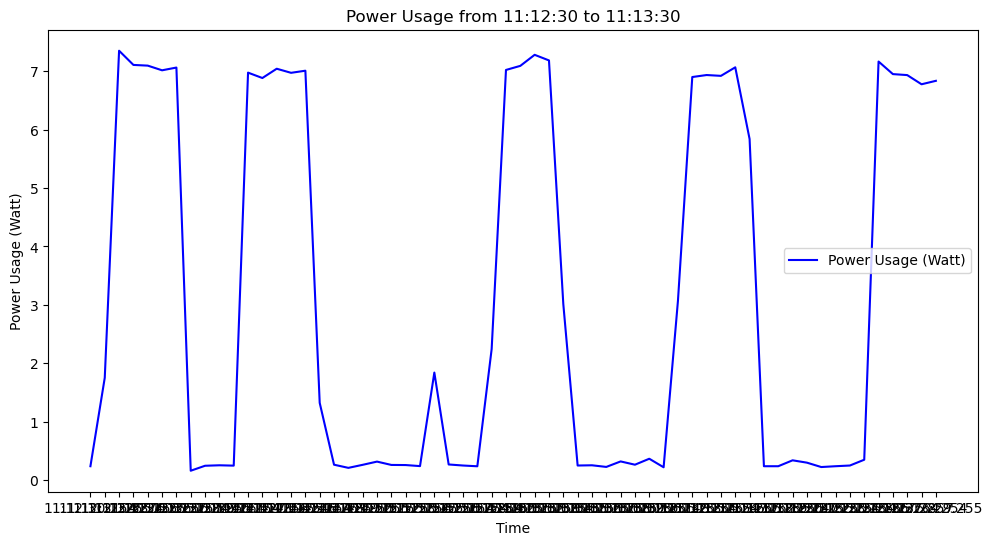

In [33]:
start_time = '11:12:30'  # Adjust to your desired start time
end_time = '11:13:30'    # Adjust to your desired end time

# Filter the dataset to only include data within this interval
filtered_data = power_data[(power_data['System Time'] >= start_time) &
                                 (power_data['System Time'] <= end_time)]

# Plotting the filtered data
plt.figure(figsize=(12, 6))
plt.plot(filtered_data['System Time'], filtered_data[' Package Power (Watt)'], label='Power Usage (Watt)', color='blue')

# Adding labels and title
plt.xlabel('Time')
plt.ylabel('Power Usage (Watt)')
plt.title(f'Power Usage from {start_time} to {end_time}')
plt.legend()



# Show the plot
plt.show()

In [9]:
execution_times

,File Name,Start Time,End Time
0,slow_samples/Law-of-cosines---triples/law-of-c...,11:12:31.131,11:12:36.352
1,slow_samples/Law-of-cosines---triples/law-of-c...,11:12:40.355,11:12:45.813
2,slow_samples/Abundant-deficient-and-perfect-nu...,11:12:49.818,11:12:49.851
3,slow_samples/Abundant-deficient-and-perfect-nu...,11:12:53.854,11:12:54.035
4,slow_samples/Abundant-deficient-and-perfect-nu...,11:12:58.041,11:13:02.931
...,...,...,...
74,slow_samples/Eulers-sum-of-powers-conjecture/e...,11:19:20.756,11:19:35.278
75,slow_samples/Eulers-sum-of-powers-conjecture/e...,11:19:39.283,11:19:42.519
76,slow_samples/Eulers-sum-of-powers-conjecture/e...,11:19:46.524,11:19:46.607
77,slow_samples/Non-transitive-dice/non-transitiv...,11:19:50.617,11:19:51.314


In [10]:

# Function to convert time strings to datetime objects for comparison
def convert_to_datetime(time_str, date_str='2023-11-29'):
    """ Convert a time string to a datetime object, assuming a specific date. """
    return datetime.strptime(f'{date_str} {time_str}', '%Y-%m-%d %H:%M:%S.%f')


In [11]:
# Convert the time columns in both datasets to datetime objects
power_data['System Time'] = power_data['System Time'].apply(convert_to_datetime)
execution_times['Start Time'] = execution_times['Start Time'].apply(convert_to_datetime)
execution_times['End Time'] = execution_times['End Time'].apply(convert_to_datetime)



In [12]:
# Initialize a dictionary to hold the total energy consumption for each file
energy_consumption = {}

# Adjusted column name for the total power usage
total_power_column = ' Package Power (Watt)'

# Calculate the energy consumption for each Python file execution
for _, row in execution_times.iterrows():
    file_name = row['File Name']
    start_time = row['Start Time']
    end_time = row['End Time']

    # Filter the power usage data to only include data during the execution time of the file
    relevant_power_data = power_data[(power_data['System Time'] >= start_time) & 
                                           (power_data['System Time'] <= end_time)]
    
    # Calculate the total energy used during this time
    total_energy_kwh = relevant_power_data[total_power_column].sum()

    # Store the calculated energy consumption for the file
    energy_consumption[file_name] = total_energy_kwh



In [13]:
energy_consumption_df = pd.DataFrame(list(energy_consumption.items()), columns=['File Name', 'Energy Consumption (Joules)'])

In [14]:
energy_consumption_df[['Base Path', 'Specific File Name']] = energy_consumption_df['File Name'].str.rsplit('/', n=1, expand=True)

energy_consumption_df

,File Name,Energy Consumption (Joules),Base Path,Specific File Name
0,slow_samples/Law-of-cosines---triples/law-of-c...,37.371,slow_samples/Law-of-cosines---triples,law-of-cosines---triples-2.py
1,slow_samples/Law-of-cosines---triples/law-of-c...,34.870,slow_samples/Law-of-cosines---triples,law-of-cosines---triples-1.py
2,slow_samples/Abundant-deficient-and-perfect-nu...,0.000,slow_samples/Abundant-deficient-and-perfect-nu...,abundant-deficient-and-perfect-number-classifi...
3,slow_samples/Abundant-deficient-and-perfect-nu...,0.000,slow_samples/Abundant-deficient-and-perfect-nu...,abundant-deficient-and-perfect-number-classifi...
4,slow_samples/Abundant-deficient-and-perfect-nu...,30.812,slow_samples/Abundant-deficient-and-perfect-nu...,abundant-deficient-and-perfect-number-classifi...
...,...,...,...,...
74,slow_samples/Eulers-sum-of-powers-conjecture/e...,111.503,slow_samples/Eulers-sum-of-powers-conjecture,eulers-sum-of-powers-conjecture-2.py
75,slow_samples/Eulers-sum-of-powers-conjecture/e...,22.043,slow_samples/Eulers-sum-of-powers-conjecture,eulers-sum-of-powers-conjecture-1.py
76,slow_samples/Eulers-sum-of-powers-conjecture/e...,0.000,slow_samples/Eulers-sum-of-powers-conjecture,eulers-sum-of-powers-conjecture-4.py
77,slow_samples/Non-transitive-dice/non-transitiv...,7.055,slow_samples/Non-transitive-dice,non-transitive-dice-2.py


In [15]:
len(set(energy_consumption_df['Base Path']))

22

In [16]:
max_energy_per_base_path = energy_consumption_df.groupby('Base Path')['Energy Consumption (Joules)'].transform('max')
min_energy_per_base_path = energy_consumption_df.groupby('Base Path')['Energy Consumption (Joules)'].transform('min')


# Create a new column 'Is Max Energy' that is 1 if the file has the max energy in its base path, 0 otherwise
energy_consumption_df['Is Max Energy'] = (energy_consumption_df['Energy Consumption (Joules)'] == max_energy_per_base_path).astype(int)
energy_consumption_df['Is Min Energy'] = (energy_consumption_df['Energy Consumption (Joules)'] == min_energy_per_base_path).astype(int)


# Display the updated DataFrame
energy_consumption_df



,File Name,Energy Consumption (Joules),Base Path,Specific File Name,Is Max Energy,Is Min Energy
0,slow_samples/Law-of-cosines---triples/law-of-c...,37.371,slow_samples/Law-of-cosines---triples,law-of-cosines---triples-2.py,1,0
1,slow_samples/Law-of-cosines---triples/law-of-c...,34.870,slow_samples/Law-of-cosines---triples,law-of-cosines---triples-1.py,0,1
2,slow_samples/Abundant-deficient-and-perfect-nu...,0.000,slow_samples/Abundant-deficient-and-perfect-nu...,abundant-deficient-and-perfect-number-classifi...,0,1
3,slow_samples/Abundant-deficient-and-perfect-nu...,0.000,slow_samples/Abundant-deficient-and-perfect-nu...,abundant-deficient-and-perfect-number-classifi...,0,1
4,slow_samples/Abundant-deficient-and-perfect-nu...,30.812,slow_samples/Abundant-deficient-and-perfect-nu...,abundant-deficient-and-perfect-number-classifi...,0,0
...,...,...,...,...,...,...
74,slow_samples/Eulers-sum-of-powers-conjecture/e...,111.503,slow_samples/Eulers-sum-of-powers-conjecture,eulers-sum-of-powers-conjecture-2.py,1,0
75,slow_samples/Eulers-sum-of-powers-conjecture/e...,22.043,slow_samples/Eulers-sum-of-powers-conjecture,eulers-sum-of-powers-conjecture-1.py,0,0
76,slow_samples/Eulers-sum-of-powers-conjecture/e...,0.000,slow_samples/Eulers-sum-of-powers-conjecture,eulers-sum-of-powers-conjecture-4.py,0,1
77,slow_samples/Non-transitive-dice/non-transitiv...,7.055,slow_samples/Non-transitive-dice,non-transitive-dice-2.py,0,1


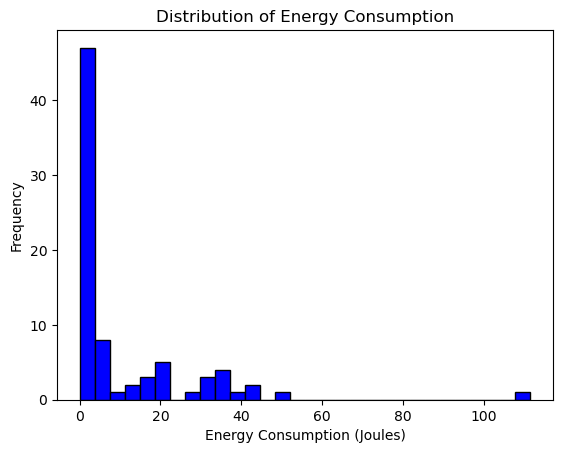

In [70]:
# Assuming your DataFrame is named 'df' and the column with energy consumption data is named 'Energy_Consumption'
plt.hist(energy_consumption_df['Energy Consumption (Joules)'], bins=30, color='blue', edgecolor='black')  # Adjust the number of bins as needed

# Adding labels and title
plt.xlabel('Energy Consumption (Joules)')
plt.ylabel('Frequency')
plt.title('Distribution of Energy Consumption')

# Show the plot
plt.show()

In [17]:
client = OpenAI()


# Directory containing the Python files
root_directory_path = 'slow_samples/'

# Function to read and store the contents of each Python file
def read_max_python_files(directory):
    file_contents = {}
    for index, row in energy_consumption_df.iterrows():
        if row['Is Max Energy']==1:
            with open(row['File Name'], 'r') as file:
                file_contents[row['File Name']] = file.read()
    return file_contents

# Read the contents of Python files
file_contents = read_max_python_files(root_directory_path)

# Create a list of all possible pairs of Python files
file_pairs = list(itertools.combinations(file_contents.keys(), 2))


In [18]:
len(file_contents)

22

In [55]:
with open('energy_comparison_results.csv', mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['File 1', 'File 2', 'Model Prediction'])


    # Iterate through each pair and construct the prompt
    for pair in tqdm(file_pairs):
        file_1, file_2 = pair
    
        prompt = f"Given the following two Python files, estimate which one consumes more energy when run. Place your response (either 1 or 2) in a JSON entry titled \"estimate\". \n\nPython file 1: '{file_contents[file_1]}' \n\nPython file 2: '{file_contents[file_2]}'"
    
        # Send the prompt to the model
        response = client.chat.completions.create(
            model="gpt-4-1106-preview",
            response_format={"type": "json_object"},
            messages=[
                {"role": "system", "content": "You are a helpful assistant who formats responses in JSON."},
                {"role": "user", "content": prompt}
            ]
        )
    
        # Print or process the response
        result = json.loads(response.choices[0].message.content)
        writer.writerow([file_1, file_2, result['estimate']])


100%|███████████████████████████████████████████| 52/52 [01:27<00:00,  1.68s/it]


In [56]:
predictions = pd.read_csv("energy_comparison_results.csv")

In [57]:
predictions

,File 1,File 2,Model Prediction
0,slow_samples/Law-of-cosines---triples/law-of-c...,slow_samples/Law-of-cosines---triples/law-of-c...,1
1,slow_samples/Abundant-deficient-and-perfect-nu...,slow_samples/Abundant-deficient-and-perfect-nu...,1
2,slow_samples/Abundant-deficient-and-perfect-nu...,slow_samples/Abundant-deficient-and-perfect-nu...,1
3,slow_samples/Abundant-deficient-and-perfect-nu...,slow_samples/Abundant-deficient-and-perfect-nu...,1
4,slow_samples/Abundant-deficient-and-perfect-nu...,slow_samples/Abundant-deficient-and-perfect-nu...,1
5,slow_samples/Greedy-algorithm-for-Egyptian-fra...,slow_samples/Greedy-algorithm-for-Egyptian-fra...,1
6,slow_samples/Numbers-which-are-the-cube-roots-...,slow_samples/Numbers-which-are-the-cube-roots-...,1
7,slow_samples/Super-d-numbers/super-d-numbers-1.py,slow_samples/Super-d-numbers/super-d-numbers-2.py,2
8,slow_samples/Color-of-a-screen-pixel/color-of-...,slow_samples/Color-of-a-screen-pixel/color-of-...,2
9,slow_samples/Color-of-a-screen-pixel/color-of-...,slow_samples/Color-of-a-screen-pixel/color-of-...,1


In [58]:
energy_consumption_df.set_index("File Name")

,Energy Consumption (Joules),Base Path,Specific File Name,Is Max Energy,Is Min Energy
File Name,,,,,
slow_samples/Law-of-cosines---triples/law-of-cosines---triples-2.py,37.371,slow_samples/Law-of-cosines---triples,law-of-cosines---triples-2.py,1,0
slow_samples/Law-of-cosines---triples/law-of-cosines---triples-1.py,34.870,slow_samples/Law-of-cosines---triples,law-of-cosines---triples-1.py,0,1
slow_samples/Abundant-deficient-and-perfect-number-classifications/abundant-deficient-and-perfect-number-classifications-3.py,0.000,slow_samples/Abundant-deficient-and-perfect-nu...,abundant-deficient-and-perfect-number-classifi...,0,1
slow_samples/Abundant-deficient-and-perfect-number-classifications/abundant-deficient-and-perfect-number-classifications-2.py,0.000,slow_samples/Abundant-deficient-and-perfect-nu...,abundant-deficient-and-perfect-number-classifi...,0,1
slow_samples/Abundant-deficient-and-perfect-number-classifications/abundant-deficient-and-perfect-number-classifications-6.py,30.812,slow_samples/Abundant-deficient-and-perfect-nu...,abundant-deficient-and-perfect-number-classifi...,0,0
...,...,...,...,...,...
slow_samples/Eulers-sum-of-powers-conjecture/eulers-sum-of-powers-conjecture-2.py,111.503,slow_samples/Eulers-sum-of-powers-conjecture,eulers-sum-of-powers-conjecture-2.py,1,0
slow_samples/Eulers-sum-of-powers-conjecture/eulers-sum-of-powers-conjecture-1.py,22.043,slow_samples/Eulers-sum-of-powers-conjecture,eulers-sum-of-powers-conjecture-1.py,0,0
slow_samples/Eulers-sum-of-powers-conjecture/eulers-sum-of-powers-conjecture-4.py,0.000,slow_samples/Eulers-sum-of-powers-conjecture,eulers-sum-of-powers-conjecture-4.py,0,1


In [59]:
def is_prediction_correct(row):
    # Retrieve the true energy consumption for each file
    true_energy_1 = energy_consumption_df.loc[energy_consumption_df['File Name'] == row['File 1'], 'Energy Consumption (Joules)'].item()
    true_energy_2 = energy_consumption_df.loc[energy_consumption_df['File Name'] == row['File 2'], 'Energy Consumption (Joules)'].item()

    # Determine the actual comparison
    true_comparison = 1 if true_energy_1 > true_energy_2 else 2
    # print(f"True: {true_comparison}, pred: {type(row['Model Prediction'])}")

    # Compare with the model's prediction
    return int(str(true_comparison) == str(row['Model Prediction']))


In [60]:
# Apply the function to each row in the predictions DataFrame
predictions['Correct?'] = predictions.apply(is_prediction_correct, axis=1)

# Calculate the number of accurate predictions
accurate_predictions = predictions['Correct?'].sum()

# Print the number of accurate predictions
print(f"Accurate predictions count: {accurate_predictions}")

# Display the updated predictions DataFrame
predictions

Accurate predictions count: 35


,File 1,File 2,Model Prediction,Correct?
0,slow_samples/Law-of-cosines---triples/law-of-c...,slow_samples/Law-of-cosines---triples/law-of-c...,1,1
1,slow_samples/Abundant-deficient-and-perfect-nu...,slow_samples/Abundant-deficient-and-perfect-nu...,1,1
2,slow_samples/Abundant-deficient-and-perfect-nu...,slow_samples/Abundant-deficient-and-perfect-nu...,1,1
3,slow_samples/Abundant-deficient-and-perfect-nu...,slow_samples/Abundant-deficient-and-perfect-nu...,1,1
4,slow_samples/Abundant-deficient-and-perfect-nu...,slow_samples/Abundant-deficient-and-perfect-nu...,1,1
5,slow_samples/Greedy-algorithm-for-Egyptian-fra...,slow_samples/Greedy-algorithm-for-Egyptian-fra...,1,1
6,slow_samples/Numbers-which-are-the-cube-roots-...,slow_samples/Numbers-which-are-the-cube-roots-...,1,1
7,slow_samples/Super-d-numbers/super-d-numbers-1.py,slow_samples/Super-d-numbers/super-d-numbers-2.py,2,0
8,slow_samples/Color-of-a-screen-pixel/color-of-...,slow_samples/Color-of-a-screen-pixel/color-of-...,2,0
9,slow_samples/Color-of-a-screen-pixel/color-of-...,slow_samples/Color-of-a-screen-pixel/color-of-...,1,1


In [61]:
print(f"Accuracy: {accurate_predictions / len(predictions)}")

Accuracy: 0.6730769230769231


# Testing with equivalent python implementations

In [62]:
max_energy_df = energy_consumption_df[energy_consumption_df["Is Max Energy"]==1]
min_energy_df = energy_consumption_df[energy_consumption_df["Is Min Energy"]==1]

# Initialize a list to store pairs
file_pairs = []

# Creating pairs for each base path
for _, max_row in max_energy_df.iterrows():
    base_path = max_row['Base Path']
    max_file = max_row['File Name']
    
    # Filter min energy files for the same base path
    min_files = min_energy_df[min_energy_df['Base Path'] == base_path]['File Name']
    
    # Create pairs
    for min_file in min_files:
        file_pairs.append((max_file, min_file))

In [63]:
def read_paired_python_files(pairs):
    file_contents = {}
    for pair in pairs:
        with open(pair[0], 'r') as file:
            file_contents[pair[0]] = file.read()
        with open(pair[1], 'r') as file:
            file_contents[pair[1]] = file.read()
    return file_contents

In [64]:
file_contents = read_paired_python_files(file_pairs)

In [65]:
with open('energy_comparison_results_paired.csv', mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['File 1', 'File 2', 'Model Prediction'])


    # Iterate through each pair and construct the prompt
    for pair in tqdm(file_pairs):
        file_1, file_2 = pair
    
        prompt = f"Given the following two Python files, estimate which one consumes MORE energy when run. Place your response (either 1 or 2) in a JSON entry titled \"estimate\". \n\nPython file 1: '{file_contents[file_1]}' \n\nPython file 2: '{file_contents[file_2]}'"
    
        # Send the prompt to the model
        response = client.chat.completions.create(
            model="gpt-4-1106-preview",
            response_format={"type": "json_object"},
            messages=[
                {"role": "system", "content": "You are a helpful assistant who formats responses in JSON."},
                {"role": "user", "content": prompt}
            ]
        )
    
        # Print or process the response
        result = json.loads(response.choices[0].message.content)
        writer.writerow([file_1, file_2, result['estimate']])


100%|███████████████████████████████████████████| 52/52 [01:26<00:00,  1.67s/it]


In [66]:
predictions_paired = pd.read_csv("energy_comparison_results_paired.csv")

In [67]:
# Apply the function to each row in the predictions DataFrame
predictions_paired['Correct?'] = predictions_paired.apply(is_prediction_correct, axis=1)

# Calculate the number of accurate predictions
accurate_predictions_paired = predictions_paired['Correct?'].sum()

# Print the number of accurate predictions
print(f"Accurate predictions count: {accurate_predictions_paired}")

# Display the updated predictions DataFrame
predictions_paired

Accurate predictions count: 36


,File 1,File 2,Model Prediction,Correct?
0,slow_samples/Law-of-cosines---triples/law-of-c...,slow_samples/Law-of-cosines---triples/law-of-c...,1,1
1,slow_samples/Abundant-deficient-and-perfect-nu...,slow_samples/Abundant-deficient-and-perfect-nu...,1,1
2,slow_samples/Abundant-deficient-and-perfect-nu...,slow_samples/Abundant-deficient-and-perfect-nu...,1,1
3,slow_samples/Abundant-deficient-and-perfect-nu...,slow_samples/Abundant-deficient-and-perfect-nu...,1,1
4,slow_samples/Abundant-deficient-and-perfect-nu...,slow_samples/Abundant-deficient-and-perfect-nu...,1,1
5,slow_samples/Greedy-algorithm-for-Egyptian-fra...,slow_samples/Greedy-algorithm-for-Egyptian-fra...,1,1
6,slow_samples/Numbers-which-are-the-cube-roots-...,slow_samples/Numbers-which-are-the-cube-roots-...,2,0
7,slow_samples/Super-d-numbers/super-d-numbers-1.py,slow_samples/Super-d-numbers/super-d-numbers-2.py,2,0
8,slow_samples/Color-of-a-screen-pixel/color-of-...,slow_samples/Color-of-a-screen-pixel/color-of-...,2,0
9,slow_samples/Color-of-a-screen-pixel/color-of-...,slow_samples/Color-of-a-screen-pixel/color-of-...,1,1


In [68]:
print(f"Accuracy: {accurate_predictions_paired / len(predictions_paired)}")

Accuracy: 0.6923076923076923
